In [140]:
from __future__ import division
import numpy as np
import scipy as sp
import math
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
from clustering import *
from generate_data import *
from pred_analysis import *
import scipy.stats as st
from cycler import cycler

In [151]:
df = pd.read_csv('bcs.csv')
df['error_diff']=df.bcs_err - df.init_err
df.head()

,m,n,k,p,L,G,r,lda,p_wy,s_wy,...,s_wx,ami_yx,ami_xw,ami_yw,init_err,bcs_err,minc,maxc,cs_err,error_diff
0,100,200,1,10,100,1000,0.2,5,0.858798,0.875979,...,0.869972,0.560569,0.412126,0.161620,0.645664,0.666776,0.000015,0.565569,1.0,0.021112
1,100,200,1,10,100,1000,0.2,5,0.818041,0.812946,...,0.843662,0.449281,0.214430,0.186134,0.617131,0.621201,0.000003,0.441874,1.0,0.004071
2,100,200,1,10,100,1000,0.2,5,0.844665,0.862583,...,0.841177,0.306425,0.193601,0.205251,0.642600,0.657431,0.000002,0.478684,1.0,0.014831
3,100,200,1,10,100,1000,0.2,5,0.834234,0.837893,...,0.857481,0.321279,0.226575,0.117039,0.614623,0.628126,0.000006,0.472865,1.0,0.013502
4,100,200,1,10,100,1000,0.2,5,0.870137,0.880633,...,0.876393,0.426364,0.409520,0.222641,0.633261,0.661667,0.000013,0.451964,1.0,0.028406


In [152]:
df.loc[df['cs_err'].idxmax()]

m              100.000000
n              200.000000
k                1.000000
p               10.000000
L              100.000000
G             1000.000000
r                0.200000
lda              5.000000
p_wy             0.858798
s_wy             0.875979
p_xy             0.988419
s_xy             0.989167
p_wx             0.852786
s_wx             0.869972
ami_yx           0.560569
ami_xw           0.412126
ami_yw           0.161620
init_err         0.645664
bcs_err          0.666776
minc             0.000015
maxc             0.565569
cs_err           1.000000
error_diff       0.021112
Name: 0, dtype: float64

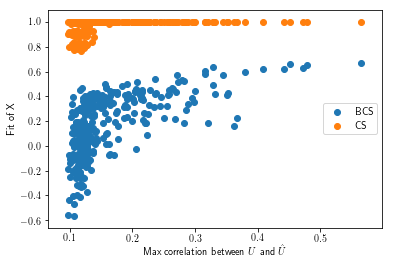

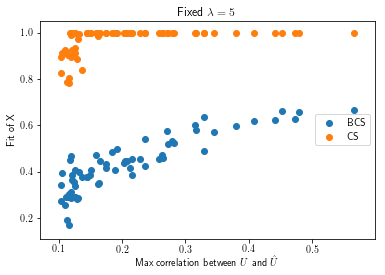

In [154]:
plt.rc('text', usetex=True)
plt.scatter(df.maxc, df.bcs_err, label='BCS')
plt.scatter(df.maxc, df.cs_err, label = 'CS')
plt.xlabel(r'Max correlation between $U$ and $\hat{U}$')
plt.ylabel('Fit of X')
plt.legend(loc = 5)

plt.figure()
plt.scatter(df[df.lda==5].maxc, df[df.lda==5].bcs_err, label='BCS')
plt.scatter(df[df.lda==5].maxc, df[df.lda==5].cs_err, label = 'CS')
plt.xlabel(r'Max correlation between $U$ and $\hat{U}$')
plt.ylabel('Fit of X')
plt.title(r'Fixed $\lambda = 5$')
plt.legend(loc = 5)

In [155]:
s1 = df[df.m==50]
s1.head()

,m,n,k,p,L,G,r,lda,p_wy,s_wy,...,s_wx,ami_yx,ami_xw,ami_yw,init_err,bcs_err,minc,maxc,cs_err,error_diff
100,50,200,1,10,100,1000,0.2,5,0.835163,0.830355,...,0.847843,0.398807,0.364825,0.233631,0.540228,0.532363,0.000014,0.279551,1.0,-0.007865
101,50,200,1,10,100,1000,0.2,5,0.888758,0.894124,...,0.861710,0.356437,0.523494,0.218186,0.532567,0.523916,0.000005,0.281752,1.0,-0.008650
102,50,200,1,10,100,1000,0.2,5,0.797503,0.808528,...,0.845455,0.490710,0.403953,0.224300,0.497410,0.489201,0.000002,0.329356,1.0,-0.008209
103,50,200,1,10,100,1000,0.2,5,0.818264,0.824171,...,0.879281,0.304473,0.356729,0.183710,0.483844,0.460832,0.000040,0.264232,1.0,-0.023012
104,50,200,1,10,100,1000,0.2,5,0.854486,0.872718,...,0.837374,0.431422,0.420018,0.185007,0.572980,0.571331,0.000027,0.344951,1.0,-0.001649


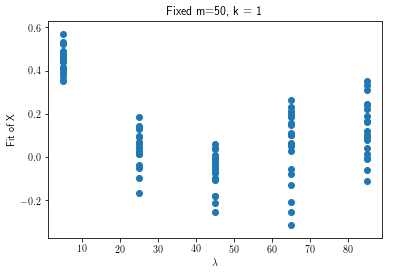

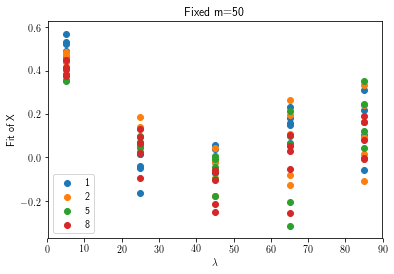

In [156]:
#Fit vs Lambda for fixed m=50

plt.figure()
plt.scatter(s1.lda, s1.bcs_err, label = 'k=1')
plt.xlabel(r'$\lambda$')
plt.ylabel('Fit of X')
plt.title('Fixed m=50, k = 1')


plt.figure()
groups = s1.groupby('k')

for name, group in groups:
    plt.scatter(group.lda, group.bcs_err, label=name)
    
plt.xlabel(r'$\lambda$')
plt.ylabel('Fit of X')
plt.title('Fixed m=50')
plt.legend()

plt.show()

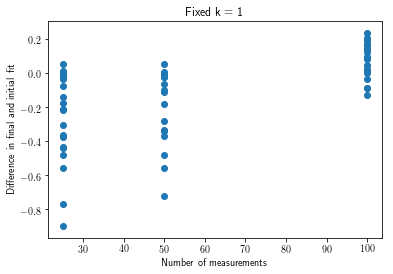

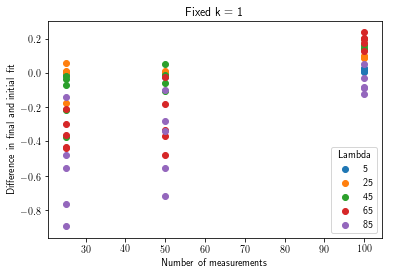

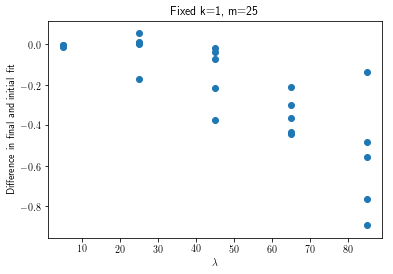

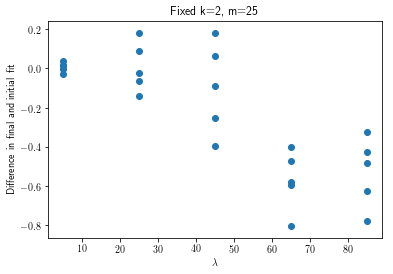

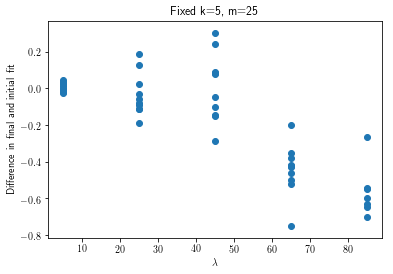

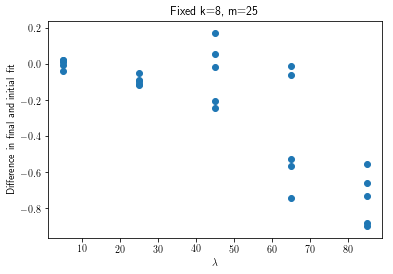

In [158]:
plt.figure()
plt.scatter(df[df.k==1].m, df[df.k==1].error_diff) #How does number of measurements affect overfitting?
plt.xlabel('Number of measurements')
plt.ylabel('Difference in final and initial fit')
plt.title('Fixed k = 1')
#Most variance in m=25


plt.figure()
groups = df[df.k==1].groupby('lda')
for name, group in groups:
    plt.scatter(group.m, group.error_diff, label=name)
plt.title('Fixed k = 1')    
plt.xlabel('Number of measurements')
plt.ylabel('Difference in final and initial fit')  
plt.legend(title ='Lambda')

plt.figure()
s2 = df[(df.k==1) & (df.m==25)]
plt.scatter(s2.lda, s2.error_diff)
plt.xlabel(r'$\lambda$')
plt.ylabel('Difference in final and initial fit')  
plt.title('Fixed k=1, m=25')

plt.figure()
s2 = df[(df.k==2) & (df.m==25)]
plt.scatter(s2.lda, s2.error_diff)
plt.xlabel(r'$\lambda$')
plt.ylabel('Difference in final and initial fit')  
plt.title('Fixed k=2, m=25')

plt.figure()
s2 = df[(df.k==5) & (df.m==25)]
plt.scatter(s2.lda, s2.error_diff)
plt.xlabel(r'$\lambda$')
plt.ylabel('Difference in final and initial fit')  
plt.title('Fixed k=5, m=25')

plt.figure()
s2 = df[(df.k==8) & (df.m==25)]
plt.scatter(s2.lda, s2.error_diff)
plt.xlabel(r'$\lambda$')
plt.ylabel('Difference in final and initial fit')  
plt.title('Fixed k=8, m=25')

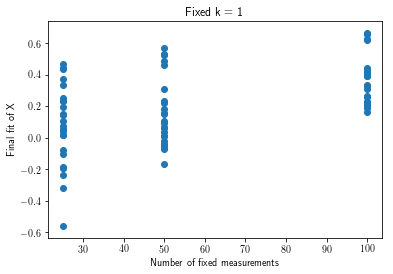

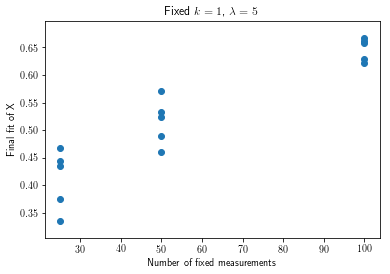

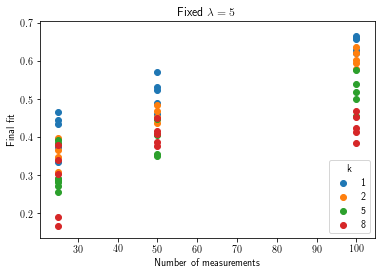

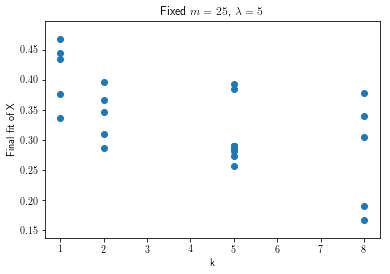

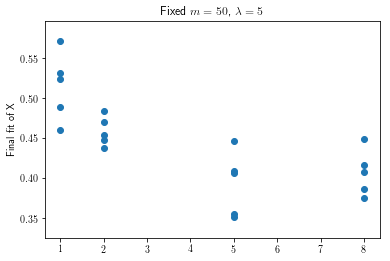

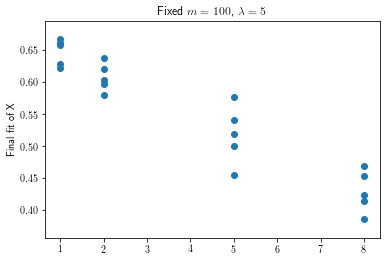

In [160]:
plt.figure()
plt.scatter(df[df.k==1].m, df[df.k==1].bcs_err)
plt.xlabel('Number of fixed measurements')
plt.ylabel('Final fit of X')
plt.title('Fixed k = 1')

plt.figure()
plt.scatter(df[(df.k==1)&(df.lda==5)].m, df[(df.k==1)&(df.lda==5)].bcs_err)
plt.xlabel('Number of fixed measurements')
plt.ylabel('Final fit of X')
plt.title(r'Fixed $k = 1$, $\lambda = 5$')

plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.m, group.bcs_err, label=name)
plt.title(r'Fixed $\lambda = 5$')    
plt.xlabel('Number of measurements')
plt.ylabel('Final fit')  
plt.legend(title ='k', loc = 4)

plt.figure()
plt.scatter(df[(df.lda==5)& (df.m==25)].k, df[(df.lda==5)& (df.m==25)].bcs_err) 
plt.xlabel('k')
plt.ylabel('Final fit of X')
plt.title(r'Fixed $m=25$, $\lambda = 5$')

plt.figure()
plt.scatter(df[(df.lda==5)& (df.m==50)].k, df[(df.lda==5)& (df.m==50)].bcs_err)
plt.ylabel('Final fit of X')
plt.title(r'Fixed $m=50$, $\lambda = 5$')

plt.figure()
plt.scatter(df[(df.lda==5)& (df.m==100)].k, df[(df.lda==5)& (df.m==100)].bcs_err)
plt.ylabel('Final fit of X')
plt.title(r'Fixed $m=100$, $\lambda = 5$')

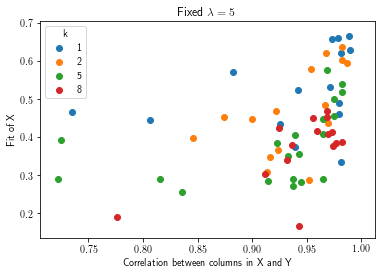

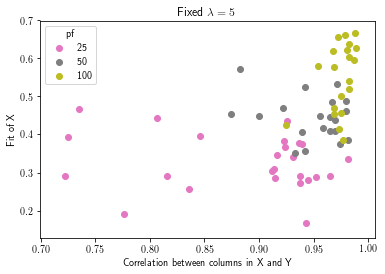

In [163]:
plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.p_xy, group.bcs_err, label=name)
    
plt.xlabel('Correlation between columns in X and Y')
plt.ylabel('Fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
fig,ax = plt.subplots(1)
ax.set_prop_cycle(cycler('color', ['tab:pink', 'tab:gray', 'tab:olive',]))
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.p_xy, group.bcs_err, label=name)
    
plt.xlabel('Correlation between columns in X and Y')
plt.ylabel('Fit of X')
plt.legend(title='pf')
plt.title(r'Fixed $\lambda = 5$')

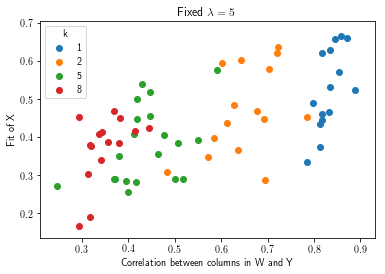

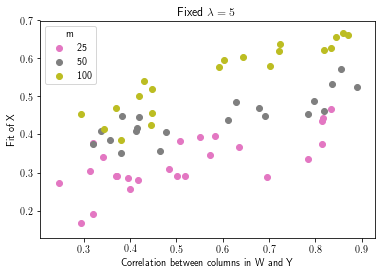

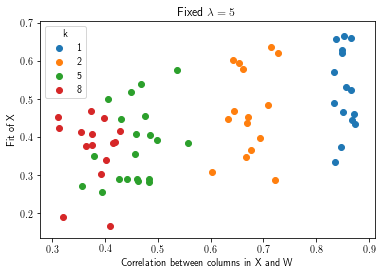

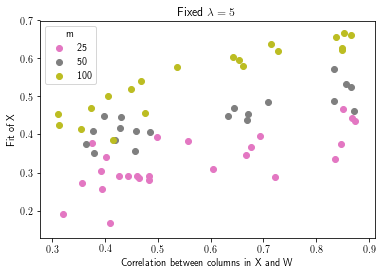

In [165]:

plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.p_wy, group.bcs_err, label=name)
plt.xlabel('Correlation between columns in W and Y')
plt.ylabel('Fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
fig,ax = plt.subplots(1)
ax.set_prop_cycle(cycler('color', ['tab:pink', 'tab:gray', 'tab:olive',]))
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.p_wy, group.bcs_err, label=name)
plt.xlabel('Correlation between columns in W and Y')
plt.ylabel('Fit of X')
plt.legend(title='m')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.p_wx, group.bcs_err, label=name)
plt.xlabel('Correlation between columns in X and W')
plt.ylabel('Fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
fig,ax = plt.subplots(1)
ax.set_prop_cycle(cycler('color', ['tab:pink', 'tab:gray', 'tab:olive',]))
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.p_wx, group.bcs_err, label=name)
plt.xlabel('Correlation between columns in X and W')
plt.ylabel('Fit of X')
plt.legend(title='m')
plt.title(r'Fixed $\lambda = 5$')

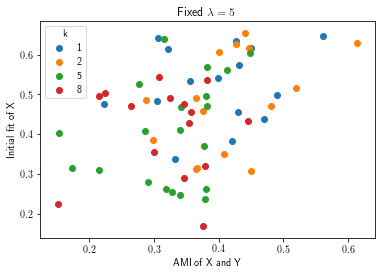

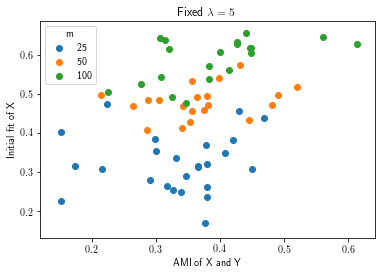

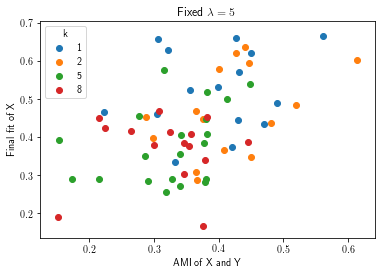

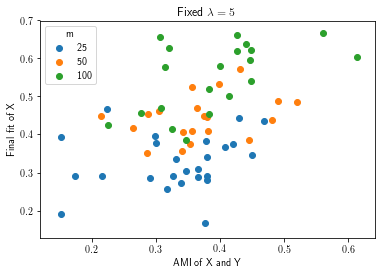

In [166]:
plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.ami_yx, group.init_err, label=name)
    
plt.xlabel('AMI of X and Y')
plt.ylabel('Initial fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.ami_yx, group.init_err, label=name)
    
plt.xlabel('AMI of X and Y')
plt.ylabel('Initial fit of X')
plt.legend(title='m')
plt.title(r'Fixed $\lambda = 5$')



plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.ami_yx, group.bcs_err, label=name)
    
plt.xlabel('AMI of X and Y')
plt.ylabel('Final fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.ami_yx, group.bcs_err, label=name)
    
plt.xlabel('AMI of X and Y')
plt.ylabel('Final fit of X')
plt.legend(title='m')
plt.title(r'Fixed $\lambda = 5$')




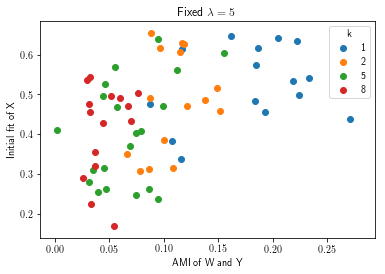

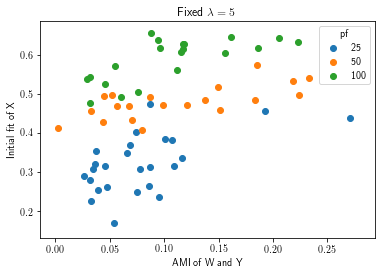

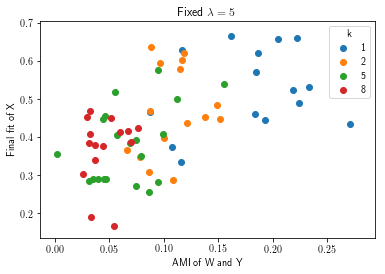

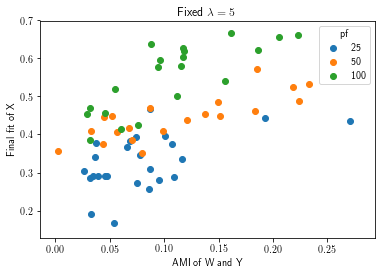

In [99]:
plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.ami_yw, group.init_err, label=name)
plt.xlabel('AMI of W and Y')
plt.ylabel('Initial fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')
plt.figure()
groups = df[df.lda==5].groupby('pf')
for name, group in groups:
    plt.scatter(group.ami_yw, group.init_err, label=name)
plt.xlabel('AMI of W and Y')
plt.ylabel('Initial fit of X')
plt.legend(title='pf')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.ami_yw, group.bcs_err, label=name)
plt.xlabel('AMI of W and Y')
plt.ylabel('Final fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')

plt.figure()
groups = df[df.lda==5].groupby('pf')
for name, group in groups:
    plt.scatter(group.ami_yw, group.bcs_err, label=name)
plt.xlabel('AMI of W and Y')
plt.ylabel('Final fit of X')
plt.legend(title='pf')
plt.title(r'Fixed $\lambda = 5$')

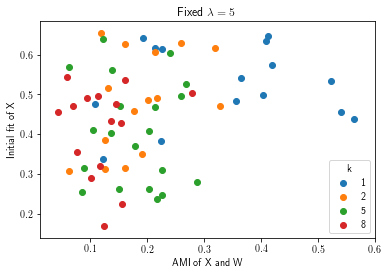

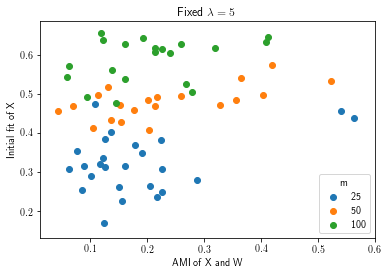

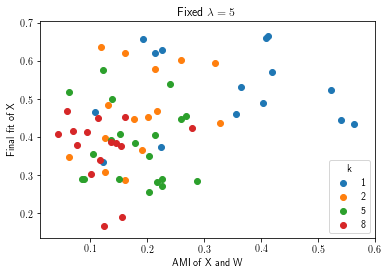

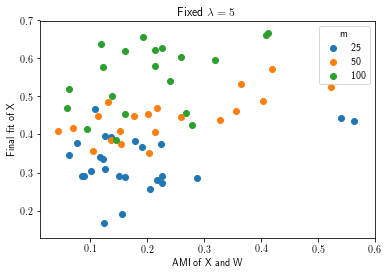

In [167]:



plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.ami_xw, group.init_err, label=name)
plt.xlabel('AMI of X and W')
plt.ylabel('Initial fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')
plt.figure()
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.ami_xw, group.init_err, label=name)
plt.xlabel('AMI of X and W')
plt.ylabel('Initial fit of X')
plt.legend(title='m')
plt.title(r'Fixed $\lambda = 5$')



plt.figure()
groups = df[df.lda==5].groupby('k')
for name, group in groups:
    plt.scatter(group.ami_xw, group.bcs_err, label=name)
plt.xlabel('AMI of X and W')
plt.ylabel('Final fit of X')
plt.legend(title='k')
plt.title(r'Fixed $\lambda = 5$')


plt.figure()
groups = df[df.lda==5].groupby('m')
for name, group in groups:
    plt.scatter(group.ami_xw, group.bcs_err, label=name)
plt.xlabel('AMI of X and W')
plt.ylabel('Final fit of X')
plt.legend(title='m')
plt.title(r'Fixed $\lambda = 5$')

